In [2]:
from codecs import ignore_errors

import kagglehub
import os
import pandas as pd
# Download latest version to the specified directory
path = kagglehub.dataset_download("arshkon/linkedin-job-postings")

#path = "/home/leon/.cache/kagglehub/datasets/arshkon/linkedin-job-postings/versions/13"

print(f"Path to dataset files: {path}")
print(f"List of files in the dataset: {os.listdir(path)}")

/Users/yacinebenihaddadene/Library/Caches/pypoetry/virtualenvs/nlp-linkedin-offers-VnDYFxbb-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/yacinebenihaddadene/.cache/kagglehub/datasets/arshkon/linkedin-job-postings/versions/13
List of files in the dataset: ['postings.csv', 'mappings', 'jobs', 'companies']


## Loading raw data

In this section, we wll load raw data from the dataset. We use the `postings.csv` file, which contains job postings from LinkedIn. The dataset includes various features such as company name, job title, description, location, work type, and more. We will also check for missing values in the dataset, to have a first idea of which target variable to choose for our regression task.

In [3]:
postings_raw = pd.read_csv(path + "/postings.csv")

In [4]:
postings_raw

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,...,NaN,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,NaN,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN,NaN,99201.0,53063.0
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,NaN,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN


In [5]:
postings_raw.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips'],
      dtype='object')

In [6]:
print(f"NaN in company_name: {postings_raw['company_name'].isna().sum()}")
print(f"NaN in title: {postings_raw['title'].isna().sum()}")
print(f"NaN in description: {postings_raw['description'].isna().sum()}")
print(f"NaN in location: {postings_raw['location'].isna().sum()}")
print(f"NaN in work_type: {postings_raw['work_type'].isna().sum()}")
print(f"NaN in company_id: {postings_raw['company_id'].isna().sum()}")
print(f"NaN in normalized_salary: {postings_raw['normalized_salary'].isna().sum()}")
# med salary
print(f"NaN in med_salary: {postings_raw['med_salary'].isna().sum()}")
print(f"NaN in min_salary: {postings_raw['min_salary'].isna().sum()}")
print(f"NaN in max_salary: {postings_raw['max_salary'].isna().sum()}")
print(f"NaN in views: {postings_raw['views'].isna().sum()}")
print(f"NaN in applies: {postings_raw['applies'].isna().sum()}")

#Series that shows the number of NaN values in each column
print(postings_raw.isna().sum())

NaN in company_name: 1719
NaN in title: 0
NaN in description: 7
NaN in location: 0
NaN in work_type: 0
NaN in company_id: 1717
NaN in normalized_salary: 87776
NaN in med_salary: 117569
NaN in min_salary: 94056
NaN in max_salary: 94056
NaN in views: 1689
NaN in applies: 100529
job_id                             0
company_name                    1719
title                              0
description                        7
max_salary                     94056
pay_period                     87776
location                           0
company_id                      1717
views                           1689
med_salary                    117569
min_salary                     94056
formatted_work_type                0
applies                       100529
original_listed_time               0
remote_allowed                108603
job_posting_url                    0
application_url                36665
application_type                   0
expiry                             0
closed_time         

The observation of NaN values of some important columns of the dataset show the following:
- `company_name`, `title`, `description`, `company_id` and others have little to no NaN values, so as of now we consider that they could be used as features for our regression task, which will be confirmed or not with the feature selection process.
- `views` has not a lot of NaN values compared to the size of the dataset, so it could be used as a target variable for our regression task, will be confirmed or not with the feature selection process.
- `normalized_salary` has a lot of NaN values, but the resulting size should be enough, so it could not be used as a target variable for our regression task, will be confirmed or not with the feature selection process.
- `applies` has a lot of NaN values, but the resulting size should be enough, so it could not be used as a target variable for our regression task, will be confirmed or not with the feature selection process.

In [7]:
# distribution of every categorical column: to determine if we should drop some of them beacause of low variance (exemple: one class with very few samples compared to the others)

categorical_columns = [
    "pay_period",
    "work_type",
    "formatted_work_type",
    "remote_allowed",
    "application_type",
    "formatted_experience_level",
    "sponsored",
    "compensation_type"
]

for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(postings_raw[col].value_counts())
    # print(f"Number of unique values in {col}: {postings_raw[col].nunique()}")
    print(f"Number of NaN values in {col}: {postings_raw[col].isna().sum()}")


Unique values in pay_period:
pay_period
YEARLY      20628
HOURLY      14741
MONTHLY       518
WEEKLY        177
BIWEEKLY        9
Name: count, dtype: int64
Number of NaN values in pay_period: 87776
Unique values in work_type:
work_type
FULL_TIME     98814
CONTRACT      12117
PART_TIME      9696
TEMPORARY      1190
INTERNSHIP      983
VOLUNTEER       562
OTHER           487
Name: count, dtype: int64
Number of NaN values in work_type: 0
Unique values in formatted_work_type:
formatted_work_type
Full-time     98814
Contract      12117
Part-time      9696
Temporary      1190
Internship      983
Volunteer       562
Other           487
Name: count, dtype: int64
Number of NaN values in formatted_work_type: 0
Unique values in remote_allowed:
remote_allowed
1.0    15246
Name: count, dtype: int64
Number of NaN values in remote_allowed: 108603
Unique values in application_type:
application_type
OffsiteApply          84607
ComplexOnsiteApply    31049
SimpleOnsiteApply      8192
UnknownApply        

In [8]:
#distribution of every numerical column: to determine if we should drop some of them beacause of low variance (exemple: one class with very few samples compared to the others)

numerical_columns = [
    "normalized_salary",
    "med_salary",
    "min_salary",
    "max_salary",
    "views",
    "applies",
]

for col in numerical_columns:
    print(f"Unique values in {col}:")
    print(postings_raw[col].describe())
    # print(f"Number of unique values in {col}: {postings_raw[col].nunique()}")
    print(f"Number of NaN values in {col}: {postings_raw[col].isna().sum()}")

Unique values in normalized_salary:
count    3.607300e+04
mean     2.053270e+05
std      5.097627e+06
min      0.000000e+00
25%      5.200000e+04
50%      8.150000e+04
75%      1.250000e+05
max      5.356000e+08
Name: normalized_salary, dtype: float64
Number of NaN values in normalized_salary: 87776
Unique values in med_salary:
count      6280.000000
mean      22015.619876
std       52255.873846
min           0.000000
25%          18.940000
50%          25.500000
75%        2510.500000
max      750000.000000
Name: med_salary, dtype: float64
Number of NaN values in med_salary: 117569
Unique values in min_salary:
count    2.979300e+04
mean     6.491085e+04
std      4.959738e+05
min      1.000000e+00
25%      3.700000e+01
50%      6.000000e+04
75%      1.000000e+05
max      8.500000e+07
Name: min_salary, dtype: float64
Number of NaN values in min_salary: 94056
Unique values in max_salary:
count    2.979300e+04
mean     9.193942e+04
std      7.011101e+05
min      1.000000e+00
25%      4.82

## Step 1: Data Preprocessing

### Drop NaN values

In [9]:
postings = postings_raw.copy()
postings.dropna(subset=["company_name", "title", "description", "company_id"], inplace=True)

In [10]:
postings

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,20.0,HOURLY,"Raleigh, NC",1481176.0,9.0,NaN,...,NaN,1.713456e+12,NaN,0,INTERNSHIP,USD,BASE_SALARY,35360.0,27601.0,37183.0
6,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,300000.0,YEARLY,United States,81942316.0,7.0,NaN,...,NaN,1.712861e+12,NaN,0,CONTRACT,USD,BASE_SALARY,180000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,...,NaN,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,NaN,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN,NaN,99201.0,53063.0
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,NaN,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN


In [11]:
df_salary = postings[postings["normalized_salary"].notna()]
df_views = postings[postings["views"].notna()]
df_applies = postings[postings["applies"].notna()]

In [12]:
df_salary

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,20.0,HOURLY,"Raleigh, NC",1481176.0,9.0,NaN,...,NaN,1.713456e+12,NaN,0,INTERNSHIP,USD,BASE_SALARY,35360.0,27601.0,37183.0
6,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,300000.0,YEARLY,United States,81942316.0,7.0,NaN,...,NaN,1.712861e+12,NaN,0,CONTRACT,USD,BASE_SALARY,180000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123837,3906265414,"TalentBurst, an Inc 5000 company",Contract Administrator,"Position: Clinical Contracts Analyst, Req#: 63...",45.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,NaN,1.713573e+12,NaN,0,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN
123839,3906266165,Athena Recruiting,Catering Event Manager,This role handles all the onsite catering and ...,65000.0,YEARLY,Greater Indianapolis,3056329.0,3.0,NaN,...,NaN,1.713571e+12,NaN,0,PART_TIME,USD,BASE_SALARY,57500.0,NaN,NaN
123843,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,50.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,NaN,1.713572e+12,NaN,0,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0


### Outliers observation and removal

In [13]:
df_salary.describe()

,job_id,max_salary,company_id,views,med_salary,min_salary,applies,original_listed_time,remote_allowed,expiry,closed_time,listed_time,sponsored,normalized_salary,zip_code,fips
count,3.556200e+04,2.933700e+04,3.556200e+04,35094.000000,6225.000000,2.933700e+04,8674.000000,3.556200e+04,4754.0,3.556200e+04,1.700000e+02,3.556200e+04,35562.0,3.556200e+04,28826.000000,27023.000000
mean,3.896238e+09,9.224478e+04,1.128010e+07,19.632302,22007.328069,6.510887e+04,11.684113,1.713170e+12,1.0,1.716370e+12,1.713128e+12,1.713219e+12,0.0,2.070082e+05,54492.820752,26416.988380
std,8.406223e+07,7.064583e+05,2.461481e+07,123.970775,52387.406391,4.997638e+05,32.612817,4.741648e+08,0.0,2.679764e+09,4.015683e+08,3.892764e+08,0.0,5.134097e+06,33107.853469,16648.164018
min,9.217160e+05,1.000000e+00,1.009000e+03,1.000000,0.000000,1.000000e+00,1.000000,1.706306e+12,1.0,1.712954e+12,1.712347e+12,1.711317e+12,0.0,0.000000e+00,1002.000000,1003.000000
25%,3.894900e+09,4.867000e+01,1.436300e+04,3.000000,18.860000,3.750000e+01,1.000000,1.712866e+12,1.0,1.715485e+12,1.712671e+12,1.712891e+12,0.0,5.200000e+04,22084.500000,8059.000000
50%,3.901982e+09,8.000000e+04,2.269650e+05,5.000000,25.370000,6.020000e+04,3.000000,1.713398e+12,1.0,1.716045e+12,1.713281e+12,1.713450e+12,0.0,8.184375e+04,55401.000000,26125.000000
75%,3.904573e+09,1.400000e+05,5.323150e+06,10.000000,2500.000000,1.000000e+05,9.000000,1.713478e+12,1.0,1.716090e+12,1.713451e+12,1.713482e+12,0.0,1.250000e+05,90001.000000,39093.000000
max,3.906267e+09,1.200000e+08,1.034565e+08,9975.000000,750000.000000,8.500000e+07,967.000000,1.713573e+12,1.0,1.729125e+12,1.713556e+12,1.713573e+12,0.0,5.356000e+08,99901.000000,56045.000000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

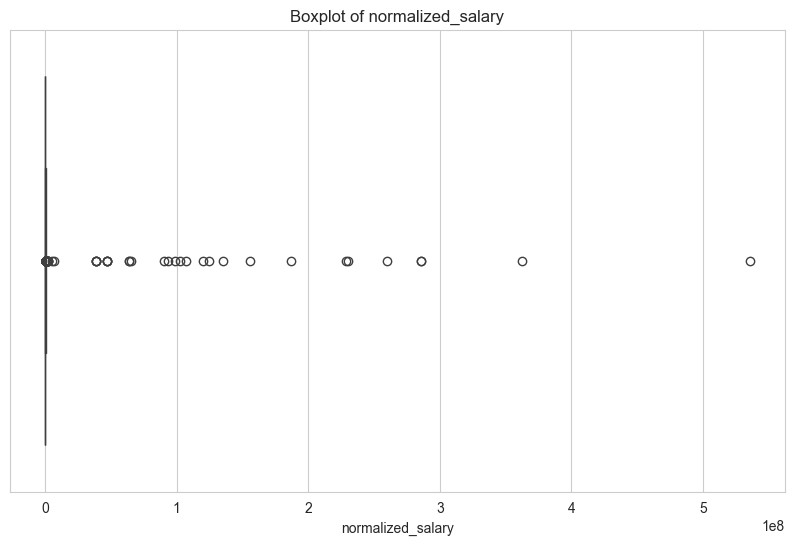

In [15]:
plot_boxplot(df_salary, "normalized_salary")

In [16]:
# Remove outliers
lower_bound = df_salary['normalized_salary'].quantile(0.01)
upper_bound = df_salary['normalized_salary'].quantile(0.99)

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")


Lower bound: 134.02500000000003
Upper bound: 300928.99999999936


In [17]:
df_salary_cleaned = df_salary[(df_salary['normalized_salary'] >= lower_bound) & (df_salary['normalized_salary'] <= upper_bound)]

In [18]:
df_salary_cleaned

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,20.0,HOURLY,"Raleigh, NC",1481176.0,9.0,NaN,...,NaN,1.713456e+12,NaN,0,INTERNSHIP,USD,BASE_SALARY,35360.0,27601.0,37183.0
6,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,300000.0,YEARLY,United States,81942316.0,7.0,NaN,...,NaN,1.712861e+12,NaN,0,CONTRACT,USD,BASE_SALARY,180000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123837,3906265414,"TalentBurst, an Inc 5000 company",Contract Administrator,"Position: Clinical Contracts Analyst, Req#: 63...",45.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,NaN,1.713573e+12,NaN,0,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN
123839,3906266165,Athena Recruiting,Catering Event Manager,This role handles all the onsite catering and ...,65000.0,YEARLY,Greater Indianapolis,3056329.0,3.0,NaN,...,NaN,1.713571e+12,NaN,0,PART_TIME,USD,BASE_SALARY,57500.0,NaN,NaN
123843,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,50.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,NaN,1.713572e+12,NaN,0,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0


## Step 2: Feature Engineering

In [19]:
company_stats = df_salary_cleaned.groupby('company_id').agg(
    avg_salary=('normalized_salary', 'mean'),
    total_postings=('job_id', 'count'),
    median_salary=('normalized_salary', 'median')
).reset_index()

In [20]:
df_salary_featured = df_salary_cleaned.copy()
df_salary_featured = df_salary_cleaned.merge(company_stats, on='company_id', how='left')
df_salary_featured['state'] = df_salary_featured['location'].str.extract(r',\s*([A-Z]{2})') # might be useless, but let's keep it for now

In [21]:
df_salary_featured

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,work_type,currency,compensation_type,normalized_salary,zip_code,fips,avg_salary,total_postings,median_salary,state
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,38480.000000,1,38480.0,NJ
1,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,62500.000000,2,62500.0,OH
2,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0,157500.000000,1,157500.0,NY
3,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,20.0,HOURLY,"Raleigh, NC",1481176.0,9.0,NaN,...,INTERNSHIP,USD,BASE_SALARY,35360.0,27601.0,37183.0,35360.000000,1,35360.0,NC
4,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,300000.0,YEARLY,United States,81942316.0,7.0,NaN,...,CONTRACT,USD,BASE_SALARY,180000.0,NaN,NaN,180000.000000,1,180000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34845,3906265414,"TalentBurst, an Inc 5000 company",Contract Administrator,"Position: Clinical Contracts Analyst, Req#: 63...",45.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN,97735.529412,17,93600.0,CA
34846,3906266165,Athena Recruiting,Catering Event Manager,This role handles all the onsite catering and ...,65000.0,YEARLY,Greater Indianapolis,3056329.0,3.0,NaN,...,PART_TIME,USD,BASE_SALARY,57500.0,NaN,NaN,57500.000000,1,57500.0,NaN
34847,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,50.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN,97735.529412,17,93600.0,CA
34848,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0,133250.000000,10,147500.0,CA


### Step 3: Feature Selection

In [22]:
corr_matrix = df_salary_featured[['views', 'applies', 'med_salary', "avg_salary", "median_salary","normalized_salary"]].corr()


In [23]:
print(corr_matrix['normalized_salary'].sort_values(ascending=False))

normalized_salary    1.000000
avg_salary           0.783946
median_salary        0.764472
med_salary           0.579742
views                0.040165
applies              0.032974
Name: normalized_salary, dtype: float64


In [24]:
print(corr_matrix['views'].sort_values(ascending=False))

views                1.000000
applies              0.472632
med_salary           0.052160
avg_salary           0.047966
median_salary        0.046820
normalized_salary    0.040165
Name: views, dtype: float64


In [25]:
print(corr_matrix['applies'].sort_values(ascending=False))

applies              1.000000
views                0.472632
median_salary        0.033107
normalized_salary    0.032974
avg_salary           0.031718
med_salary          -0.018955
Name: applies, dtype: float64


From the correlation matrix we can see that:
- `normalized_salary` is correlated with `avg_salary`, `median_salary`, `med_salary`, but not `views` and `applies`, where correlation is very low.
- `views` is correlated with `applies`, but not `normalized_salary`, where correlation is very low.
- `applies` is correlated with `views`, but not `normalized_salary`, where correlation is very low.

In [26]:
df_salary_featured.remote_allowed.describe() # variance is very low: we can drop it

count    4619.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: remote_allowed, dtype: float64

In [27]:
print(f"NaN in state: {df_salary_featured['state'].isna().sum()}")

NaN in state: 5921


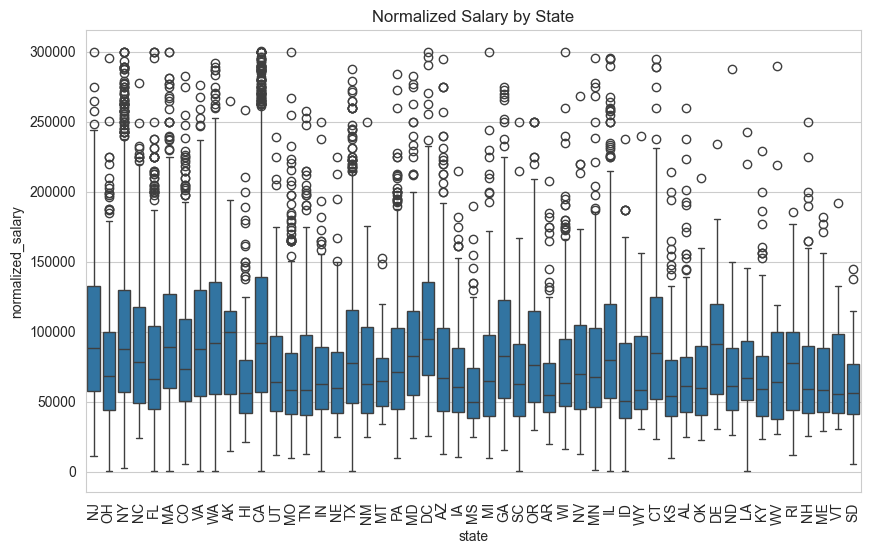

In [28]:
# plot normalized_salary vs state
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='normalized_salary', data=df_salary_featured.dropna(subset=["state"]))
plt.title('Normalized Salary by State')
plt.xticks(rotation=90)
plt.show()

In [29]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=9)
X_categorical = pd.get_dummies(df_salary_featured[['work_type', 'formatted_experience_level', "pay_period"]])
selector.fit(X_categorical, df_salary_featured["normalized_salary"])
selected_features = X_categorical.columns[selector.get_support()]

In [30]:
selected_features

Index(['work_type_CONTRACT', 'work_type_FULL_TIME', 'work_type_PART_TIME',
       'formatted_experience_level_Entry level', 'pay_period_BIWEEKLY',
       'pay_period_HOURLY', 'pay_period_MONTHLY', 'pay_period_WEEKLY',
       'pay_period_YEARLY'],
      dtype='object')

#### random forest feature importance

## Complete rundown

In [29]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression



In [30]:
import category_encoders as ce


def feature_engineer(df: pd.DataFrame, state=True, compute_company_stats=True) -> pd.DataFrame:
    """
    Feature engineer the input DataFrame to be ready for ML modeling.
    Args:
        df: pd.DataFrame: The input DataFrame to transform.
        state: bool: Whether to extract state from location.
        compute_company_stats: bool: Whether to compute company statistics.

    Returns:
        pd.DataFrame: The transformed DataFrame.

    """
    if state:
        df['state'] = df['location'].str.extract(r',\s*([A-Z]{2})')
    if compute_company_stats:
        company_stats = df.groupby('company_id').agg(
            avg_salary=('normalized_salary', 'mean'),
            total_postings=('job_id', 'count'),
            median_salary=('normalized_salary', 'median')
        ).reset_index()
        # Merge company stats into the original DataFrame
        df = df.merge(company_stats, on='company_id', how='left')

    return df


def build_feature_matrix(df: pd.DataFrame, target_encoder_cols:list[str]=None, one_hot_encoder_cols:list[str]=None, numerical_cols:list[str]=None,text_cols:list[(str,object)]=None, scaler=None, target="normalized_salary") -> pd.DataFrame:
    """
    Build the feature matrix for the regression task.

    Args:
        numerical_cols:
        df (pd.DataFrame): The input DataFrame.
        target_encoder_cols (list[str]): List of columns to be target encoded.
        one_hot_encoder_cols (list[str]): List of columns to be one-hot encoded.
        text_cols (list[(str,object)]): List of tuples containing the column name and the vectorizer to be used.
        scaler (object): Scaler object to be used for scaling the features.
        target (str): The target variable to be predicted.

    Returns:
        pd.DataFrame: The feature matrix.
    """
    # Extract target variable
    y = df[target]

    if target_encoder_cols is None:
        target_encoder_cols = ["state", "company_id"]
    if one_hot_encoder_cols is None:
        one_hot_encoder_cols = ["work_type", "formatted_experience_level", "pay_period"]
    if text_cols is None:
        text_cols = [("title", TfidfVectorizer(max_features=100, stop_words="english")), ("description", TfidfVectorizer(max_features=100, stop_words="english"))]


    if numerical_cols is None:
        numerical_cols = ["avg_salary", "total_postings", "median_salary"]
    else:
        for col in numerical_cols:
            if col not in df.columns:
                raise ValueError(f"Column {col} not found in DataFrame.")




    # Encode categorical features
    encoder = ce.TargetEncoder(cols=target_encoder_cols)
    target_encoded = encoder.fit_transform(
        df[target_encoder_cols], y
    )

    # One-hot encode low-cardinality features
    one_hot_encoded = pd.get_dummies(df[one_hot_encoder_cols], columns=one_hot_encoder_cols)

    # TF-IDF for text columns
    text_features = []
    for col, vectorizer in text_cols:
        text_vectorized = vectorizer.fit_transform(df[col]).toarray()
        text_features.append(pd.DataFrame(text_vectorized, columns=[f"{col}_{i}" for i in range(text_vectorized.shape[1])]))


    # Combine all features
    X = pd.concat([target_encoded, one_hot_encoded, df[numerical_cols]] + text_features, axis=1)

    if scaler is not None:
        X = scaler.fit_transform(X)
    return X


In [ ]:
X,y = df_salary_featured.drop(columns=["normalized_salary"]), df_salary_featured["normalized_salary"]

In [31]:
import category_encoders as ce

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=30, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R²: {r2_score(y_test, y_pred)}")

In [ ]:
# lets use linear regression for comparison
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Create a preprocessor for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', 'passthrough', X.select_dtypes(include=['object']).columns)
    ],
    remainder='drop'
)
# Create a pipeline
pipeline = make_pipeline(
    preprocessor,
    LinearRegression()
)

# Fit the model
pipeline.fit(X_train, y_train)
# Predictions
y_pred_linear = pipeline.predict(X_test)
# Evaluate
print(f"MAE: {mean_absolute_error(y_test, y_pred_linear)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_linear))}")
print(f"R²: {r2_score(y_test, y_pred_linear)}")

In [ ]:
#cross validation for random forest
from sklearn.model_selection import cross_val_score, cross_validate
cv_scores = cross_validate(model, X, y, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])
print(f"Cross-validated MAE: {-cv_scores['test_neg_mean_absolute_error'].mean()}")
print(f"Cross-validated RMSE: {np.sqrt(-cv_scores['test_neg_mean_squared_error'].mean())}")
print(f"Cross-validated R²: {cv_scores['test_r2'].mean()}")

In [ ]:
# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20)
print("Top Features:\n", top_features)



In [ ]:
new_X = build_feature_matrix(feature_engineer(df_salary_cleaned),
                             target_encoder_cols=[],
                             numerical_cols=[],
                             one_hot_encoder_cols=["work_type", "formatted_experience_level", "pay_period","company_name"],
                             text_cols=[("title", TfidfVectorizer(max_features=100, stop_words="english", ngram_range=(1,2))), ("description", TfidfVectorizer(max_features=100, stop_words="english", ngram_range=(1,2)))],
                             target="normalized_salary",
                             scaler=None)
new_y = df_salary_featured["normalized_salary"]

In [ ]:
new_X

In [ ]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

#model = RandomForestRegressor(n_estimators=30, random_state=42)
model = RandomForestRegressor(
    max_depth=8,          # Limit depth (prevents memorization)
    n_estimators=100,      # Fewer trees
    random_state=42
)
model.fit(new_X_train, new_y_train)
# Predictions
y_pred = model.predict(new_X_test)
# Evaluate
print(f"MAE: {mean_absolute_error(new_y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(new_y_test, y_pred))}")
print(f"R²: {r2_score(new_y_test, y_pred)}")

# predictions on the training set, to see if the model is overfitting
y_pred_train = model.predict(new_X_train)
# Evaluate
print(f"MAE train: {mean_absolute_error(new_y_train, y_pred_train)}")
print(f"RMSE train: {np.sqrt(mean_squared_error(new_y_train, y_pred_train))}")
print(f"R² train: {r2_score(new_y_train, y_pred_train)}")


In [ ]:
importances = pd.Series(model.feature_importances_, index=new_X.columns)
top_features = importances.sort_values(ascending=False).head(40)
print("Top Features:\n", top_features)

In [ ]:
cv_scores = cross_validate(model, new_X, new_y, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])

In [ ]:
print(f"Cross-validated MAE: {-cv_scores['test_neg_mean_absolute_error'].mean()}")
print(f"Cross-validated RMSE: {np.sqrt(-cv_scores['test_neg_mean_squared_error'].mean())}")
print(f"Cross-validated R²: {cv_scores['test_r2'].mean()}")

In [ ]:
cv_scores = cross_validate(LinearRegression(), new_X, new_y, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])

In [ ]:
print(f"Cross-validated MAE: {-cv_scores['test_neg_mean_absolute_error'].mean()}")
print(f"Cross-validated RMSE: {np.sqrt(-cv_scores['test_neg_mean_squared_error'].mean())}")
print(f"Cross-validated R²: {cv_scores['test_r2'].mean()}")

In [ ]:
postings["compensation_type"].describe()

In [ ]:
5

## Testing pipeline

In [32]:
from pipeline import build_pipeline, FeatureEngineer, TextTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
base_pipeline = build_pipeline()
base_pipeline

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_salary_cleaned,df_salary_cleaned["normalized_salary"].to_numpy() , test_size=0.2, random_state=42, shuffle=True)

In [ ]:
ytrain

In [34]:
FeatureEngineer().fit_transform(Xtrain, ytrain)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,work_type,currency,compensation_type,normalized_salary,zip_code,fips,state,avg_salary,total_postings,median_salary
0,3905224999,Strategic Staffing Solutions,Program/Project/Product Manager-Treasury Manag...,Program/Project/Product Manager-Treasury Manag...,NaN,HOURLY,"Charlotte, NC",6919.0,16.0,85.0,...,CONTRACT,USD,BASE_SALARY,176800.0,28202.0,37119.0,NC,105188.750000,8,109720.0
1,3887718233,Prestige Healthcare Resources Inc.,Outreach and Housing Liaison Administrative As...,Summary\n\nThe Outreach and Housing Liaison Ad...,60000.0,YEARLY,"Washington, DC",2960725.0,4.0,NaN,...,FULL_TIME,USD,BASE_SALARY,57500.0,20001.0,11001.0,DC,57500.000000,1,57500.0
2,3902869380,Dexian,UAT Tester (Hybrid),"Job Title: UAT TesterLocation: Tampa , FL (Hyb...",33.0,HOURLY,"Tampa, FL",91447303.0,1.0,NaN,...,FULL_TIME,USD,BASE_SALARY,65520.0,33602.0,12057.0,FL,88481.135135,37,78000.0
3,3899541335,San Francisco 49ers,Promotion Team Member,"Part of the Hype Team, Promotions Team Members...",NaN,HOURLY,"Santa Clara, CA",4543.0,86.0,18.0,...,PART_TIME,USD,BASE_SALARY,37440.0,95050.0,6085.0,CA,38480.000000,2,38480.0
4,3903453768,Karsun Solutions,Senior Oracle Database Developer,Karsun Solutions is searching for a Senior Ora...,126000.0,YEARLY,United States,1931320.0,50.0,NaN,...,FULL_TIME,USD,BASE_SALARY,112000.0,NaN,NaN,unknown,112000.000000,1,112000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27875,3901956374,Addison Group,Human Resources Manager,Title – Human Resource ManagerHours: 8 - 5 - o...,120000.0,YEARLY,"Mebane, NC",18043.0,2.0,NaN,...,FULL_TIME,USD,BASE_SALARY,110000.0,27302.0,37001.0,NC,76517.828571,49,65500.0
27876,3890894177,Clarity Security,Senior UI/UX Developer/Designer,"About UsFounded in 2020, Clarity Security's ad...",160000.0,YEARLY,United States,76321666.0,18.0,NaN,...,FULL_TIME,USD,BASE_SALARY,145000.0,NaN,NaN,unknown,145000.000000,1,145000.0
27877,3899521989,Primary Services,Marketing Analyst,Primary Services is excited to announce the ro...,39.0,HOURLY,Greater Pittsburgh Region,23099.0,16.0,NaN,...,CONTRACT,USD,BASE_SALARY,76960.0,NaN,NaN,unknown,78333.333333,3,76960.0
27878,3884805232,ESB Technologies,Enterprise Architect Telecom,•⁠ ⁠As an Enterprise Architect should have abi...,65.0,HOURLY,Dallas-Fort Worth Metroplex,42880798.0,10.0,NaN,...,CONTRACT,USD,BASE_SALARY,130000.0,NaN,NaN,unknown,134680.000000,2,134680.0


In [ ]:
base_pipeline.fit(Xtrain, ytrain)

In [ ]:
y_pred_train = base_pipeline.predict(Xtrain)
y_pred_test = base_pipeline.predict(Xtest)

# Evaluate
print(f"MAE train: {mean_absolute_error(ytrain, y_pred_train)}")
print(f"RMSE train: {np.sqrt(mean_squared_error(ytrain, y_pred_train))}")
print(f"R² train: {r2_score(ytrain, y_pred_train)}")
print(f"MAE test: {mean_absolute_error(ytest, y_pred_test)}")
print(f"RMSE test: {np.sqrt(mean_squared_error(ytest, y_pred_test))}")
print(f"R² test: {r2_score(ytest, y_pred_test)}")



In [ ]:
#checking the number of estimators and their depth in the random forest at the end of the pipeline
# depth of the trees
base_pipeline.named_steps["model"]
[estimator.get_depth() for estimator in base_pipeline.named_steps["model"].estimators_]


#THIS ONE IS CLEARLY OVERFITTING

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
pipeline = build_pipeline(model=RandomForestRegressor(n_estimators=30, max_depth=12))

In [ ]:
pipeline.fit(Xtrain, ytrain)

In [ ]:
y_pred_train = pipeline.predict(Xtrain)
y_pred_test = pipeline.predict(Xtest)
# Evaluate
print(f"MAE train: {mean_absolute_error(ytrain, y_pred_train)}")
print(f"RMSE train: {np.sqrt(mean_squared_error(ytrain, y_pred_train))}")
print(f"R² train: {r2_score(ytrain, y_pred_train)}")
print(f"MAE test: {mean_absolute_error(ytest, y_pred_test)}")
print(f"RMSE test: {np.sqrt(mean_squared_error(ytest, y_pred_test))}")
print(f"R² test: {r2_score(ytest, y_pred_test)}")

# cross validation
cv_scores = cross_validate(pipeline, Xtrain, ytrain, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])
print(f"Cross-validated MAE: {-cv_scores['test_neg_mean_absolute_error'].mean()}")
print(f"Cross-validated RMSE: {np.sqrt(-cv_scores['test_neg_mean_squared_error'].mean())}")
print(f"Cross-validated R²: {cv_scores['test_r2'].mean()}")

In [36]:
Xtrain.isna().sum()

job_id                            0
company_name                      0
title                             0
description                       0
max_salary                     4930
pay_period                        0
location                          0
company_id                        0
views                           359
med_salary                    22950
min_salary                     4930
formatted_work_type               0
applies                       21076
original_listed_time              0
remote_allowed                24143
job_posting_url                   0
application_url                9950
application_type                  0
expiry                            0
closed_time                   27746
formatted_experience_level     6059
skills_desc                   27600
listed_time                       0
posting_domain                11151
sponsored                         0
work_type                         0
currency                          0
compensation_type           

In [ ]:
gradient_boost_pipeline = build_pipeline(model=HistGradientBoostingRegressor(max_depth=12))
gradient_boost_pipeline.fit(Xtrain, ytrain)

y_pred_train = gradient_boost_pipeline.predict(Xtrain)
y_pred_test = gradient_boost_pipeline.predict(Xtest)
# Evaluate
print(f"MAE train: {mean_absolute_error(ytrain, y_pred_train)}")
print(f"RMSE train: {np.sqrt(mean_squared_error(ytrain, y_pred_train))}")
print(f"R² train: {r2_score(ytrain, y_pred_train)}")
print(f"MAE test: {mean_absolute_error(ytest, y_pred_test)}")
print(f"RMSE test: {np.sqrt(mean_squared_error(ytest, y_pred_test))}")
print(f"R² test: {r2_score(ytest, y_pred_test)}")

# cross validation
cv_scores = cross_validate(gradient_boost_pipeline, Xtrain, ytrain, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])
print(f"Cross-validated MAE: {-cv_scores['test_neg_mean_absolute_error'].mean()}")
print(f"Cross-validated RMSE: {np.sqrt(-cv_scores['test_neg_mean_squared_error'].mean())}")
print(f"Cross-validated R²: {cv_scores['test_r2'].mean()}")

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
Xtrain.dropna()

In [ ]:
mlp_pipeline = build_pipeline(model=MLPRegressor())
mlp_pipeline.fit(Xtrain, ytrain)
y_pred_train = mlp_pipeline.predict(Xtrain)
y_pred_test = mlp_pipeline.predict(Xtest)
# Evaluate
print(f"MAE train: {mean_absolute_error(ytrain, y_pred_train)}")
print(f"RMSE train: {np.sqrt(mean_squared_error(ytrain, y_pred_train))}")
print(f"R² train: {r2_score(ytrain, y_pred_train)}")
print(f"MAE test: {mean_absolute_error(ytest, y_pred_test)}")
print(f"RMSE test: {np.sqrt(mean_squared_error(ytest, y_pred_test))}")
print(f"R² test: {r2_score(ytest, y_pred_test)}")
# cross validation
cv_scores = cross_validate(mlp_pipeline, Xtrain, ytrain, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])
print(f"Cross-validated MAE: {-cv_scores['test_neg_mean_absolute_error'].mean()}")
print(f"Cross-validated RMSE: {np.sqrt(-cv_scores['test_neg_mean_squared_error'].mean())}")
print(f"Cross-validated R²: {cv_scores['test_r2'].mean()}")


# On recommence de maniere clean

In [37]:
df_salary_cleaned

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,20.0,HOURLY,"Raleigh, NC",1481176.0,9.0,NaN,...,NaN,1.713456e+12,NaN,0,INTERNSHIP,USD,BASE_SALARY,35360.0,27601.0,37183.0
6,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,300000.0,YEARLY,United States,81942316.0,7.0,NaN,...,NaN,1.712861e+12,NaN,0,CONTRACT,USD,BASE_SALARY,180000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123837,3906265414,"TalentBurst, an Inc 5000 company",Contract Administrator,"Position: Clinical Contracts Analyst, Req#: 63...",45.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,NaN,1.713573e+12,NaN,0,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN
123839,3906266165,Athena Recruiting,Catering Event Manager,This role handles all the onsite catering and ...,65000.0,YEARLY,Greater Indianapolis,3056329.0,3.0,NaN,...,NaN,1.713571e+12,NaN,0,PART_TIME,USD,BASE_SALARY,57500.0,NaN,NaN
123843,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,50.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,NaN,1.713572e+12,NaN,0,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0


In [38]:
df_salary_cleaned.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips'],
      dtype='object')

In [39]:
df = df_salary_cleaned.copy()
df = df.drop(columns=[
    "max_salary",
    "min_salary",
    "med_salary",
    "views",
    "applies",
    "original_listed_time",
    "remote_allowed",
    "job_posting_url",
    "application_url",
    "expiry",
    "closed_time",
    "listed_time",
    "posting_domain",
    "sponsored",
    "compensation_type",
    "formatted_work_type",
    "zip_code",
    "fips",
    "skills_desc"

])

In [40]:
df.head(5)

,job_id,company_name,title,description,pay_period,location,company_id,application_type,formatted_experience_level,work_type,currency,normalized_salary
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,HOURLY,"Princeton, NJ",2774458.0,ComplexOnsiteApply,NaN,FULL_TIME,USD,38480.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,YEARLY,"Cincinnati, OH",64896719.0,ComplexOnsiteApply,NaN,FULL_TIME,USD,55000.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,YEARLY,"New Hyde Park, NY",766262.0,ComplexOnsiteApply,NaN,FULL_TIME,USD,157500.0
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,HOURLY,"Raleigh, NC",1481176.0,ComplexOnsiteApply,NaN,INTERNSHIP,USD,35360.0
6,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,YEARLY,United States,81942316.0,SimpleOnsiteApply,NaN,CONTRACT,USD,180000.0


In [41]:
df["work_type"].isna().sum()

np.int64(0)

In [42]:
df["formatted_experience_level"].isna().sum()

np.int64(7539)

In [43]:
len(df)

34850

In [44]:
df_no_nan = df.copy()
df_no_nan["formatted_experience_level"] = df_no_nan["formatted_experience_level"].fillna("not specified")

In [45]:
df_no_nan.isna().sum()

job_id                        0
company_name                  0
title                         0
description                   0
pay_period                    0
location                      0
company_id                    0
application_type              0
formatted_experience_level    0
work_type                     0
currency                      0
normalized_salary             0
dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    df_no_nan,
    df_no_nan["normalized_salary"].to_numpy(),
    test_size=0.2,
    random_state=42,
    shuffle=True
)

In [49]:
X_train

,job_id,company_name,title,description,pay_period,location,company_id,application_type,formatted_experience_level,work_type,currency,normalized_salary
100706,3905224999,Strategic Staffing Solutions,Program/Project/Product Manager-Treasury Manag...,Program/Project/Product Manager-Treasury Manag...,HOURLY,"Charlotte, NC",6919.0,ComplexOnsiteApply,Mid-Senior level,CONTRACT,USD,176800.0
13256,3887718233,Prestige Healthcare Resources Inc.,Outreach and Housing Liaison Administrative As...,Summary\n\nThe Outreach and Housing Liaison Ad...,YEARLY,"Washington, DC",2960725.0,OffsiteApply,Entry level,FULL_TIME,USD,57500.0
72357,3902869380,Dexian,UAT Tester (Hybrid),"Job Title: UAT TesterLocation: Tampa , FL (Hyb...",HOURLY,"Tampa, FL",91447303.0,SimpleOnsiteApply,Mid-Senior level,FULL_TIME,USD,65520.0
42729,3899541335,San Francisco 49ers,Promotion Team Member,"Part of the Hype Team, Promotions Team Members...",HOURLY,"Santa Clara, CA",4543.0,OffsiteApply,Entry level,PART_TIME,USD,37440.0
75560,3903453768,Karsun Solutions,Senior Oracle Database Developer,Karsun Solutions is searching for a Senior Ora...,YEARLY,United States,1931320.0,OffsiteApply,Mid-Senior level,FULL_TIME,USD,112000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
58944,3901956374,Addison Group,Human Resources Manager,Title – Human Resource ManagerHours: 8 - 5 - o...,YEARLY,"Mebane, NC",18043.0,ComplexOnsiteApply,Mid-Senior level,FULL_TIME,USD,110000.0
24041,3890894177,Clarity Security,Senior UI/UX Developer/Designer,"About UsFounded in 2020, Clarity Security's ad...",YEARLY,United States,76321666.0,ComplexOnsiteApply,not specified,FULL_TIME,USD,145000.0
41256,3899521989,Primary Services,Marketing Analyst,Primary Services is excited to announce the ro...,HOURLY,Greater Pittsburgh Region,23099.0,ComplexOnsiteApply,Associate,CONTRACT,USD,76960.0
2524,3884805232,ESB Technologies,Enterprise Architect Telecom,•⁠ ⁠As an Enterprise Architect should have abi...,HOURLY,Dallas-Fort Worth Metroplex,42880798.0,ComplexOnsiteApply,Mid-Senior level,CONTRACT,USD,130000.0


In [51]:
from sklearn.neural_network import MLPRegressor

mlp_pipeline = build_pipeline(model=MLPRegressor())
mlp_pipeline.fit(X_train, y_train)
y_pred_train = mlp_pipeline.predict(X_train)
y_pred_test = mlp_pipeline.predict(X_test)
# Evaluate
print(f"MAE train: {mean_absolute_error(y_train, y_pred_train)}")
print(f"RMSE train: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"R² train: {r2_score(y_train, y_pred_train)}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred_test)}")
print(f"RMSE test: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")
print(f"R² test: {r2_score(y_test, y_pred_test)}")
# cross validation
cv_scores = cross_validate(mlp_pipeline, df_no_nan.drop(columns=["normalized_salary"]), df_no_nan["normalized_salary"].to_numpy(), cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])
print(f"Cross-validated MAE: {-cv_scores['test_neg_mean_absolute_error'].mean()}")
print(f"Cross-validated RMSE: {np.sqrt(-cv_scores['test_neg_mean_squared_error'].mean())}")
print(f"Cross-validated R²: {cv_scores['test_r2'].mean()}")


/Users/yacinebenihaddadene/Documents/School/S8/NLP1/project/NLP_Linkedin_offers/.venv/lib/python3.13/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/yacinebenihaddadene/Documents/School/S8/NLP1/project/NLP_Linkedin_offers/.venv/lib/python3.13/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


ValueError: Input X contains NaN.
MLPRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
pd.Series(y_train).isna().sum()

In [58]:
pd.DataFrame(mlp_pipeline.named_steps["preprocessor"].fit_transform(FeatureEngineer().fit_transform(X_train, ytrain), y_train)).isna().sum().sum()

np.int64(0)

In [59]:
mlp_pipeline.named_steps["model"].fit(pd.DataFrame(mlp_pipeline.named_steps["preprocessor"].fit_transform(FeatureEngineer().fit_transform(X_train, ytrain), y_train)), y_train)

MLPRegressor()

# CETTE FOIS C'EST LA BONNE FRERE

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
from data_transformation import clean_data, load_data

In [33]:
df_sal = clean_data(postings_raw.set_index("job_id"))
df_views = clean_data(postings_raw.set_index("job_id"), target="views")
df_applies = clean_data(postings_raw.set_index("job_id"), target="applies")

In [34]:
df_sal

,company_name,title,description,pay_period,location,company_id,application_type,formatted_experience_level,skills_desc,work_type,normalized_salary
job_id,,,,,,,,,,,
921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,HOURLY,"Princeton, NJ",2774458.0,ComplexOnsiteApply,Not specified,Requirements: \n\nWe are seeking a College or ...,FULL_TIME,38480.0
10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,YEARLY,"Cincinnati, OH",64896719.0,ComplexOnsiteApply,Not specified,We are currently accepting resumes for FOH - A...,FULL_TIME,55000.0
23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,YEARLY,"New Hyde Park, NY",766262.0,ComplexOnsiteApply,Not specified,This position requires a baseline understandin...,FULL_TIME,157500.0
91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,HOURLY,"Raleigh, NC",1481176.0,ComplexOnsiteApply,Not specified,Not specified,INTERNSHIP,35360.0
103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,YEARLY,United States,81942316.0,SimpleOnsiteApply,Not specified,Not specified,CONTRACT,180000.0
...,...,...,...,...,...,...,...,...,...,...,...
3906265414,"TalentBurst, an Inc 5000 company",Contract Administrator,"Position: Clinical Contracts Analyst, Req#: 63...",HOURLY,"Irvine, CA",122451.0,ComplexOnsiteApply,Mid-Senior level,Not specified,CONTRACT,83200.0
3906266165,Athena Recruiting,Catering Event Manager,This role handles all the onsite catering and ...,YEARLY,Greater Indianapolis,3056329.0,ComplexOnsiteApply,Associate,Not specified,PART_TIME,57500.0
3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,HOURLY,"Irvine, CA",122451.0,ComplexOnsiteApply,Mid-Senior level,Not specified,CONTRACT,83200.0


In [7]:
df_views

,job_id,company_name,title,description,pay_period,location,company_id,views,applies,application_type,formatted_experience_level,skills_desc,work_type
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,HOURLY,"Princeton, NJ",2774458.0,20.0,2.0,ComplexOnsiteApply,Not specified,Requirements: \n\nWe are seeking a College or ...,FULL_TIME
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,YEARLY,"Cincinnati, OH",64896719.0,8.0,0.0,ComplexOnsiteApply,Not specified,We are currently accepting resumes for FOH - A...,FULL_TIME
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,YEARLY,"New Hyde Park, NY",766262.0,16.0,0.0,ComplexOnsiteApply,Not specified,This position requires a baseline understandin...,FULL_TIME
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,HOURLY,"Raleigh, NC",1481176.0,9.0,4.0,ComplexOnsiteApply,Not specified,Not specified,INTERNSHIP
6,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,YEARLY,United States,81942316.0,7.0,1.0,SimpleOnsiteApply,Not specified,Not specified,CONTRACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,YEARLY,"Walnut Creek, CA",56120.0,1.0,0.0,ComplexOnsiteApply,Mid-Senior level,Not specified,FULL_TIME
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,UNKNOWN,United States,1124131.0,3.0,0.0,OffsiteApply,Mid-Senior level,Not specified,FULL_TIME
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,UNKNOWN,"Spokane, WA",90552133.0,3.0,0.0,OffsiteApply,Mid-Senior level,Not specified,FULL_TIME
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,UNKNOWN,"Texas, United States",2793699.0,4.0,0.0,ComplexOnsiteApply,Not specified,Not specified,FULL_TIME


In [8]:
df_applies

,job_id,company_name,title,description,pay_period,location,company_id,views,applies,application_type,formatted_experience_level,skills_desc,work_type
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,HOURLY,"Princeton, NJ",2774458.0,20.0,2.0,ComplexOnsiteApply,Not specified,Requirements: \n\nWe are seeking a College or ...,FULL_TIME
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,YEARLY,"Cincinnati, OH",64896719.0,8.0,0.0,ComplexOnsiteApply,Not specified,We are currently accepting resumes for FOH - A...,FULL_TIME
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,YEARLY,"New Hyde Park, NY",766262.0,16.0,0.0,ComplexOnsiteApply,Not specified,This position requires a baseline understandin...,FULL_TIME
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,HOURLY,"Raleigh, NC",1481176.0,9.0,4.0,ComplexOnsiteApply,Not specified,Not specified,INTERNSHIP
6,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,YEARLY,United States,81942316.0,7.0,1.0,SimpleOnsiteApply,Not specified,Not specified,CONTRACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,YEARLY,"Walnut Creek, CA",56120.0,1.0,0.0,ComplexOnsiteApply,Mid-Senior level,Not specified,FULL_TIME
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,UNKNOWN,United States,1124131.0,3.0,0.0,OffsiteApply,Mid-Senior level,Not specified,FULL_TIME
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,UNKNOWN,"Spokane, WA",90552133.0,3.0,0.0,OffsiteApply,Mid-Senior level,Not specified,FULL_TIME
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,UNKNOWN,"Texas, United States",2793699.0,4.0,0.0,ComplexOnsiteApply,Not specified,Not specified,FULL_TIME


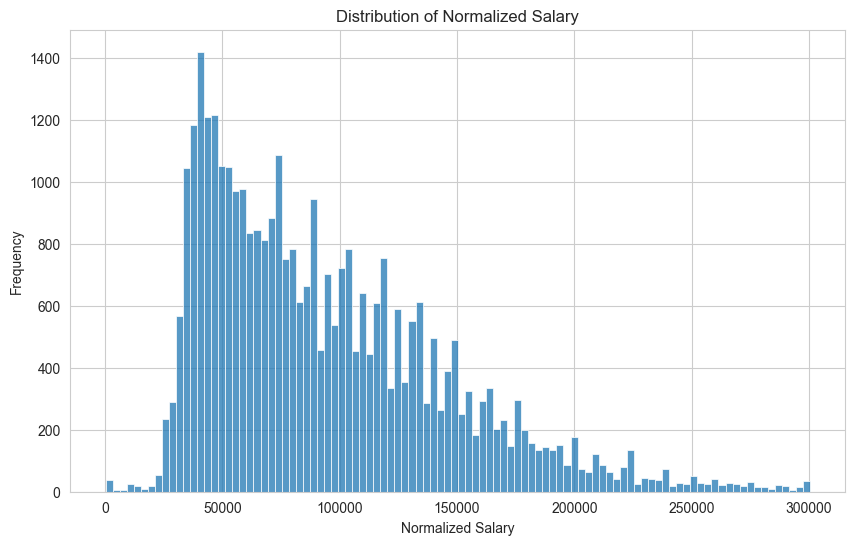

In [35]:
# distribution of normalized_salary:
plt.figure(figsize=(10, 6))
sns.histplot(df_sal["normalized_salary"], bins=100)
plt.title('Distribution of Normalized Salary')
plt.xlabel('Normalized Salary')
plt.ylabel('Frequency')
plt.show()

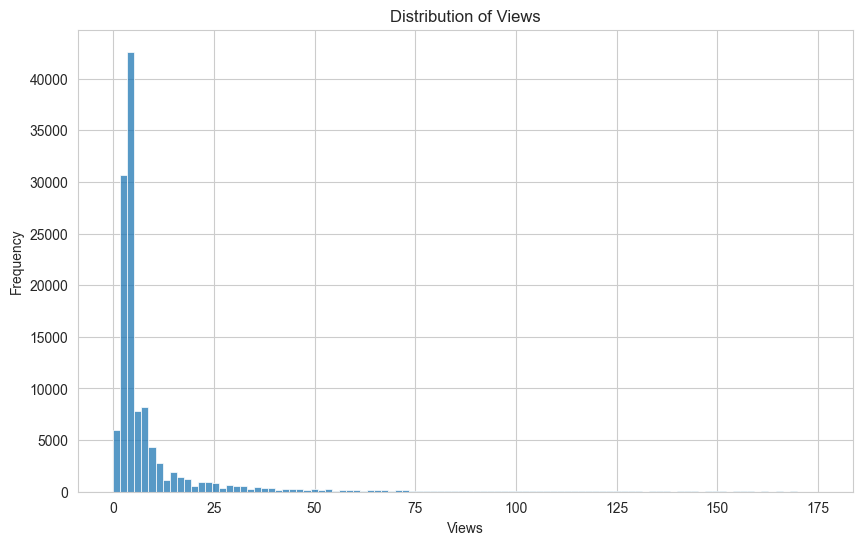

In [36]:
# distribution of views:
plt.figure(figsize=(10, 6))
sns.histplot(df_views["views"], bins=100)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

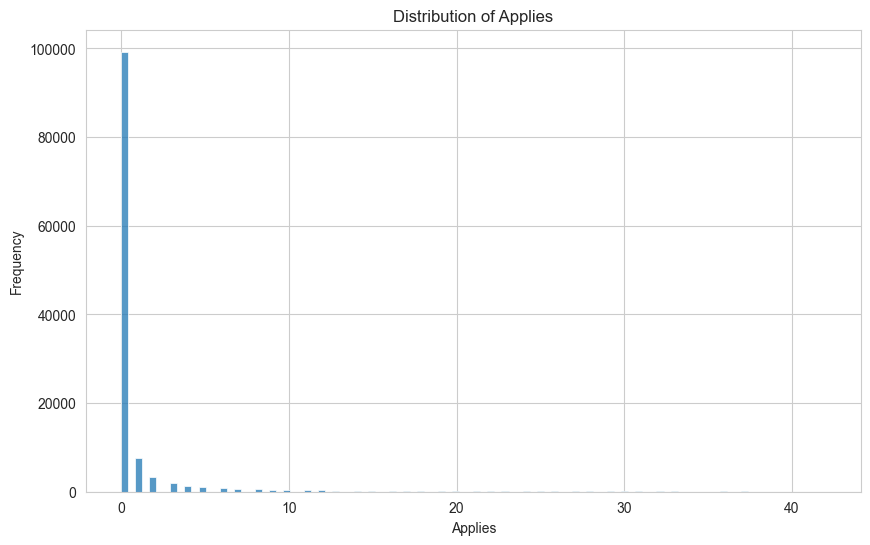

In [37]:
# distribution of applies:
plt.figure(figsize=(10, 6))
sns.histplot(df_applies["applies"], bins=100)
plt.title('Distribution of Applies')
plt.xlabel('Applies')
plt.ylabel('Frequency')
plt.show()

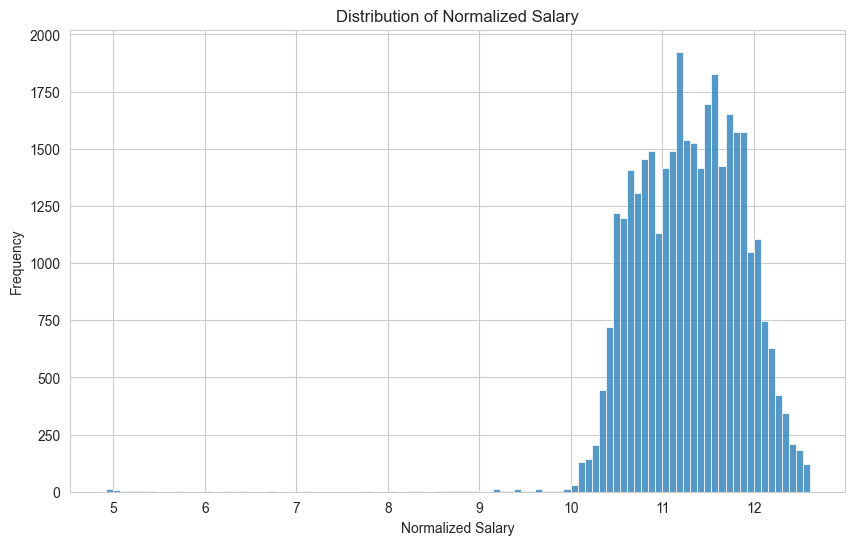

In [38]:
# distribution of log transformed normalized_salary: log(1+normalized_salary)
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df_sal["normalized_salary"]), bins=100)
plt.title('Distribution of Normalized Salary')
plt.xlabel('Normalized Salary')
plt.ylabel('Frequency')
plt.show()

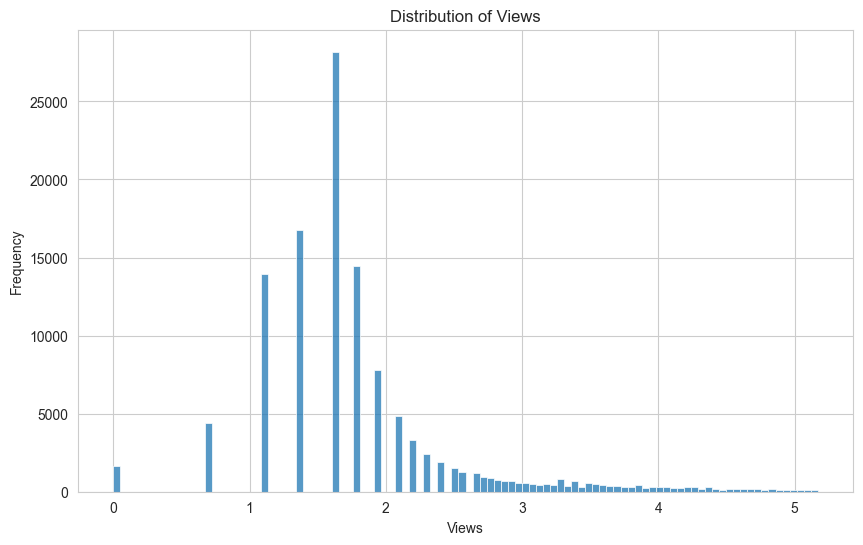

In [39]:
# distribution of log transformed views: log(1+views)
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df_views["views"]), bins=100)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

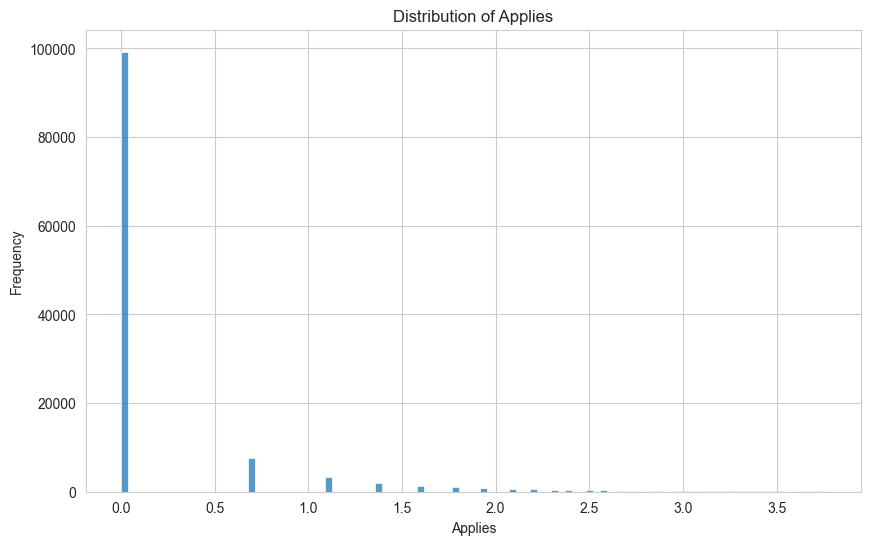

In [40]:
# distribution of log transformed applies: log(1+applies)
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df_applies["applies"]), bins=100)
plt.title('Distribution of Applies')
plt.xlabel('Applies')
plt.ylabel('Frequency')
plt.show()


* `applies` is not fit to be a target variable, because it is not normally distributed and has a lot of outliers even after log transformation.
* `views`and `normalized_salary`are normally distributed after log transformation, so they are fit to be target variables.

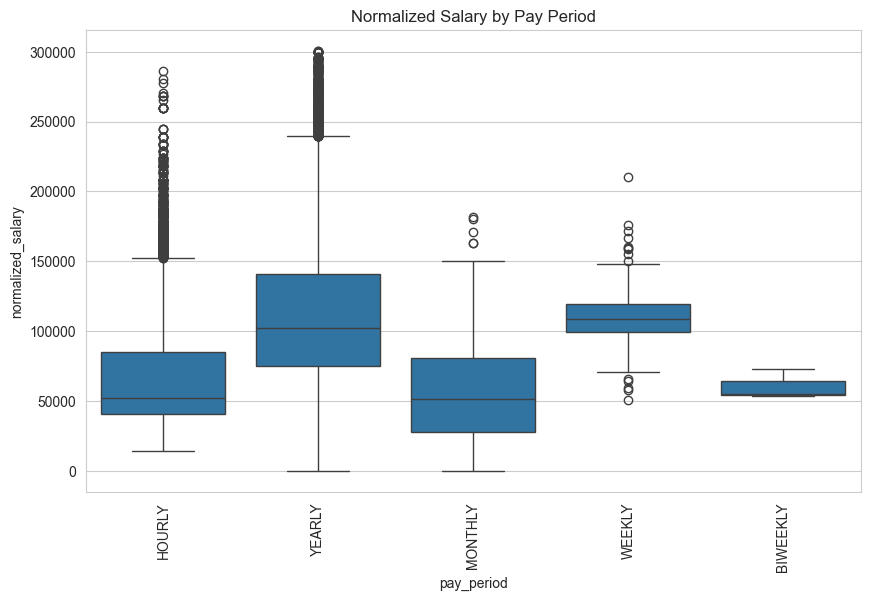

In [41]:
# distribution of salary vs pay_period
plt.figure(figsize=(10, 6))
sns.boxplot(x='pay_period', y='normalized_salary', data=df_sal.dropna(subset=["pay_period"]))
plt.title('Normalized Salary by Pay Period')
plt.xticks(rotation=90)
plt.show()


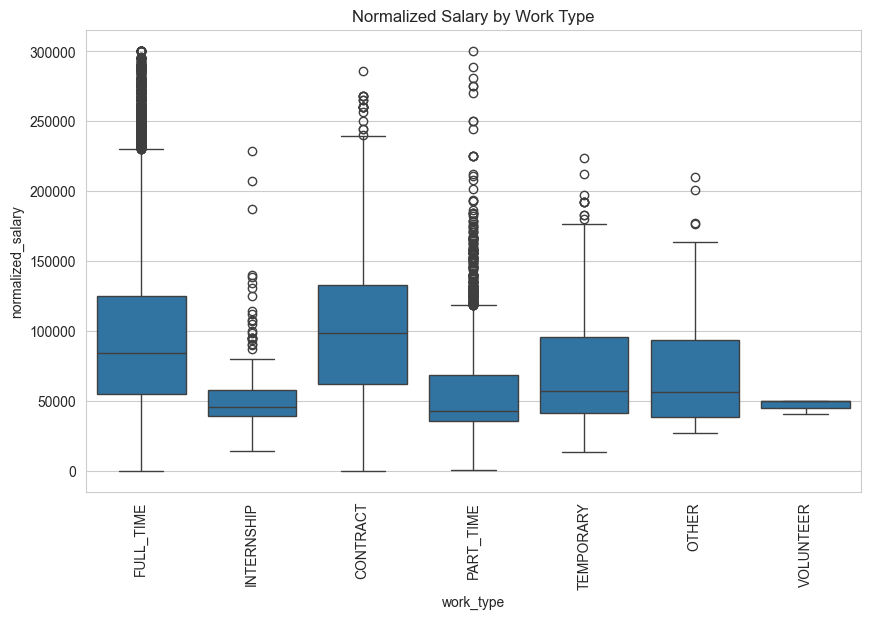

In [42]:
# distribution of salary vs work_type
plt.figure(figsize=(10, 6))
sns.boxplot(x='work_type', y='normalized_salary', data=df_sal.dropna(subset=["work_type"]))
plt.title('Normalized Salary by Work Type')
plt.xticks(rotation=90)
plt.show()


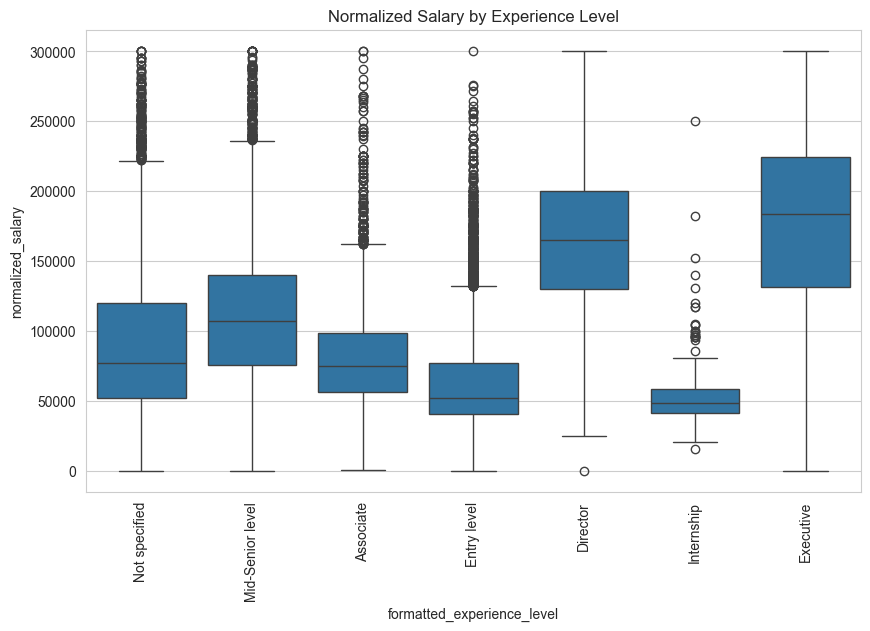

In [43]:
# distribution of salary vs formatted_experience_level
plt.figure(figsize=(10, 6))
sns.boxplot(x='formatted_experience_level', y='normalized_salary', data=df_sal.dropna(subset=["formatted_experience_level"]))
plt.title('Normalized Salary by Experience Level')
plt.xticks(rotation=90)
plt.show()


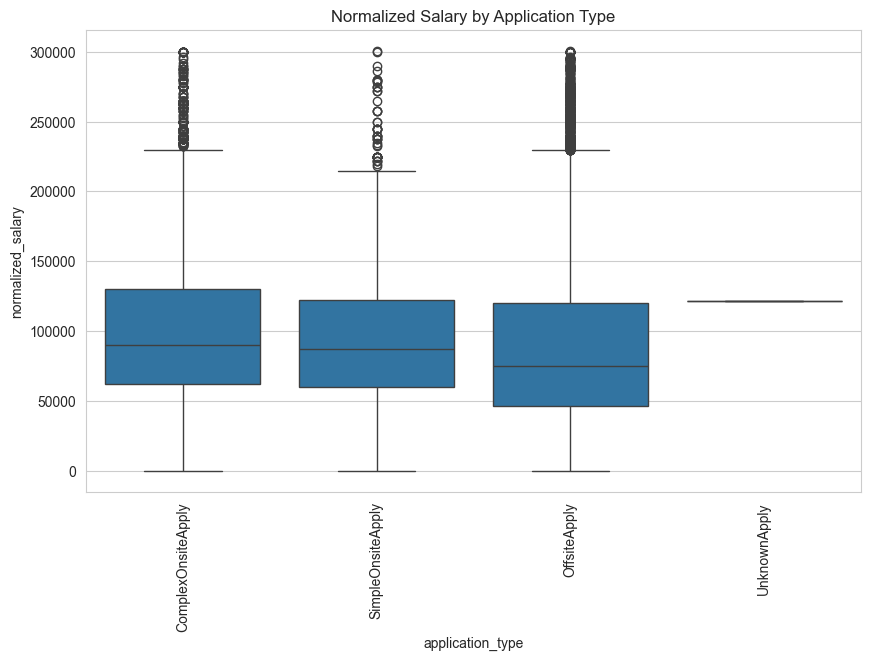

In [44]:
# distribution of salary vs application_type
plt.figure(figsize=(10, 6))
sns.boxplot(x='application_type', y='normalized_salary', data=df_sal.dropna(subset=["application_type"]))
plt.title('Normalized Salary by Application Type')
plt.xticks(rotation=90)
plt.show()

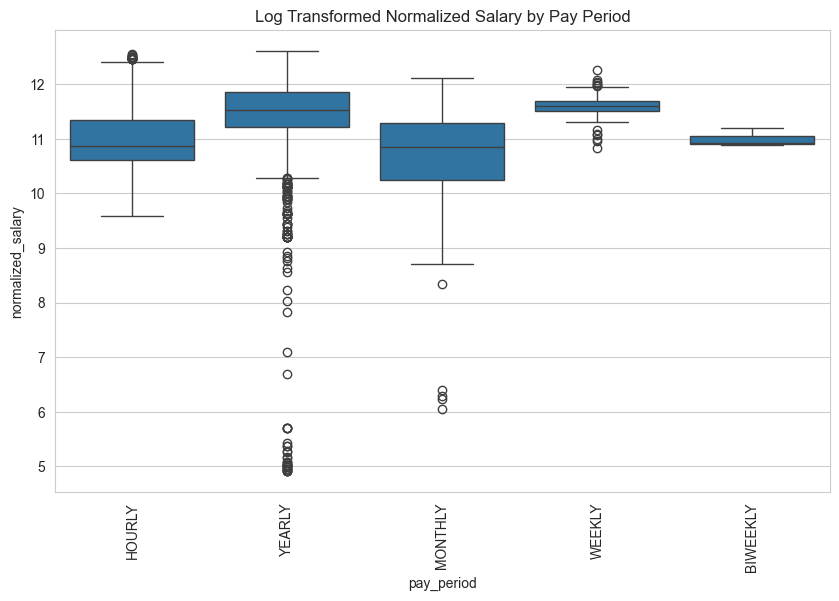

In [45]:
# distribution of log transformed salary vs pay_period
plt.figure(figsize=(10, 6))
sns.boxplot(x='pay_period', y=np.log1p(df_sal["normalized_salary"]), data=df_sal.dropna(subset=["pay_period"]))
plt.title('Log Transformed Normalized Salary by Pay Period')
plt.xticks(rotation=90)
plt.show()

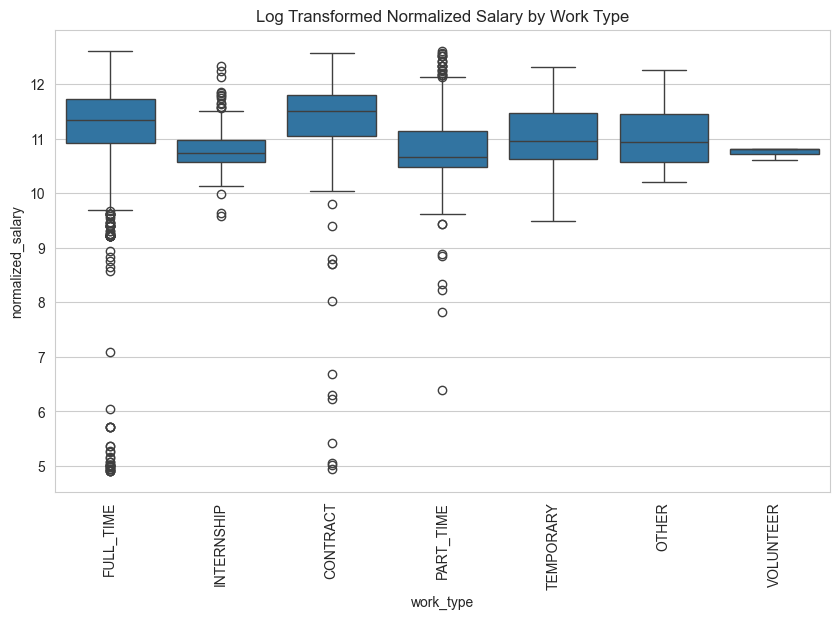

In [46]:
# distribution of log transformed salary vs work_type
plt.figure(figsize=(10, 6))
sns.boxplot(x='work_type', y=np.log1p(df_sal["normalized_salary"]), data=df_sal.dropna(subset=["work_type"]))
plt.title('Log Transformed Normalized Salary by Work Type')
plt.xticks(rotation=90)
plt.show()